# **UBIQUITOUS COMPUTING PROJECT**

<br>
<br>
<span style="font-size:1.3em;">

### **GROUP-21**

#### **Group Members:**
1. **Smit Lunagariya** - *18123024 (Mathematics and Computing)*
2. **Harin Dholakia** - *18095092 (Electronics Engineering)*
3. **Srijan Sharma** - *18095099 (Electronics Engineering)*
4. **Vishal Naik** - *18135067 (Mechanical Engineering)*

#### Under the Guidance of: Dr. Hari Prabhat Gupta
### Dataset Title: [Human activities recognition Using SmartPhones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)


</span>

## Step 1: Downloading the Dataset

<br>
<span style="font-size:1.2em;">
 
1. Making the directory named `dataset`
2. Downloading the **UCI-HAR Dataset**
3. Unzipping the dataset
4. Installing some rarely used python libraries

</span>

In [ ]:
!mkdir dataset

In [ ]:
%cd dataset

/content/dataset/dataset


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip UCI\ HAR\ Dataset.zip

--2020-12-04 12:44:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  32.0MB/s    in 1.8s    

2020-12-04 12:44:18 (32.0 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  infl

In [ ]:
!pip install scikit-plot

# Algorithm and Model-Architecture

<br>
<br>


<span style="font-size:1.2em;">


1. The Given Dataset is *shuffled* and divided into 4 training datasets and their corresponding 4 target variables dataset


2. Three of these datasets are used for training a Classifier model. We will be using **XGBClassifier** as the three classifier models.


3. Train a small **Neural Network model** on the output produced by these three classifier models when put into predicting of fourth dataset and thus training the neural network using the fourth part of dataset


4. Predicting on the testing data by passing the testing data through the above pipeline and producing the final predictions.


5. Evaluation of the model and results produced by the model.


The following figure explains the approach:

</span>

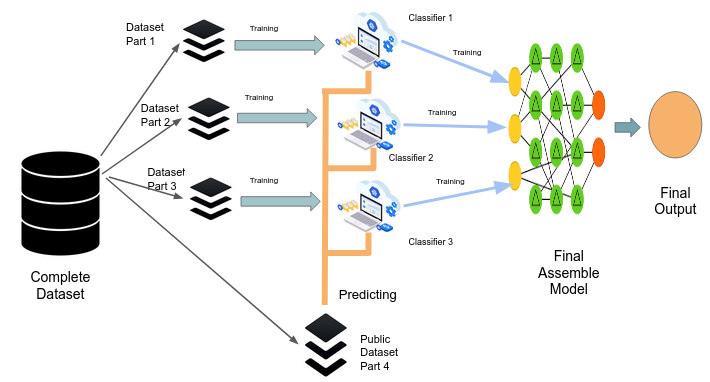

## Step 2: Importing Required Libraries


In [ ]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.core import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Step 3: Loading the Data

<br>
<span style="font-size:1.2em;">
    
1. The following cell performs the preprocessing for loading the dataset by reading from the `*.txt` files and assembling them into the model readable input dimensions and return an `numpy.ndarray` object.
</span>

In [ ]:
MAIN_FOLDER = '/content/dataset' # Edit the folder name as per path
SUB_DATA_FOLDER = 'UCI HAR Dataset' # Edit the sub data folder name as per path

read_data = lambda name : pd.read_csv(name, delim_whitespace=True, header=None)

def get_filename(feature, train):
    """
    Parameters
    ==========

    feature: bool
        If True read from files having feature vectors else from targte files.
    domain: bool
        If True, then read from training files else read from testing files.

    Returns
    =======

    output: string
        File path
    """
    domain = ""
    if train:
        domain = "train"
    else:
        domain = "test"
    if not feature: # then used for returning target file path
        return f'{MAIN_FOLDER}/{SUB_DATA_FOLDER}/{domain}/y_{domain}.txt'
    return f'{MAIN_FOLDER}/{SUB_DATA_FOLDER}/{domain}/X_{domain}.txt'


def get_features(train):
    """
    Read the ``*.txt`` files from the target path of the dataset
    and return numpy feature matrix of appropriate dimension.

    Parameters
    ==========

    train: bool
        If True, the read from training files else read from testing files.

    Returns
    =======

    output: numpy.ndarray
        Returns the feature ``numpy.ndarray`` instance of appropriate dimension
    """
    
    return read_data(get_filename(True, train)).to_numpy()

def get_target(train):
    """
    Read the ``*.txt`` files from the target path of the dataset
    and return numpy feature matrix of appropriate dimension (using One-Hot
    encoding).

    Parameters
    ==========

    train: bool
        If true, read from y_train else read from y_test

    Returns
    =======

    output: numpy.ndarray
        Returns the ``numpy.ndarray`` and using one-hot encoding of
        appropriate dimension.
    """
    return read_data(get_filename(feature=None, train=train))[0]

def get_data(train):
    """
    Main driver function for loading the data.

    Parameters
    ==========

    train: bool
        If True, the read from training folder else read from testing folder.

    Returns
    =======

    output: tuple
        Returns tuple of (X, Y)
    """
    if train:
        return (get_features(train), get_target(train))
    return (get_features(train), get_target(train))


## Step 4: Loading the Training data-set

In [ ]:
X_train, Y_train = get_data(train=True)
X_train, Y_train = shuffle(X_train, Y_train)

In [ ]:
X_train.shape, Y_train.shape # Training data shape

((7352, 561), (7352,))

In [ ]:
each_part = X_train.shape[0]//4 # Dividing the Dataset into 4 equal parts
each_part

1838

In [ ]:
training_list = [] # Stores training dataset of each part
target_list  = [] # Stores target variables of each part
for i in range(4):
  training_list.append(X_train[i: (i+1)*each_part][:][:])
  target_list.append(Y_train[i: (i+1)*each_part][:][:])

In [ ]:
training_list[0].shape, target_list[0].shape

((1838, 561), (1838,))

## Step 5: Training the Classifier Models

<br>
<br>
<span style="font-size:1.2em;">

1. We will use `XGBClassifier` for training the first three parts of the datasets and tuning them by visualizing the learning curves.

    * The **XGBoost** stands for eXtreme Gradient Boosting, which is a boosting algorithm based on gradient boosted *decision trees algorithm*. XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting. 


2. The function `plot_learning_curve` plots the learning curve followed by the model by plotting training and cross validation scores


3. We will use `SelectFromModel` for selecting the important features from the training dataset and used the newly *picked* dataset for training the model.

    * The **SelectFromModel** is a meta-transformer for selecting features based on importance weights and used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

</span>

In [ ]:
def plot_learning_curve(model, X, y, title, cv=5):
    """
    Function for plotting the learning curve of the model.

    Parameters
    ==========
  
    model : object type
        The estimator of which the learning curve is to be plotted

    X : array-like
        The dataset on which the model needs to be fitted and validated

    y : array-like
        The target variables

    title : string
        Title of the plot
  
    cv : int, cross-validation generator
        Represents Cross-Validation on dataset
    """
    train_size = np.linspace(.1, 1.0, 5)
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    axes.set_xlabel("Training examples numbers")
    axes.set_ylabel("Accuracy")
    axes.set_title(title)
    _, train_scores, test_scores = learning_curve(model, X, y,
                      cv=cv, train_sizes=train_size)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    axes.grid()
    axes.plot(train_size, train_scores_mean, 'o-', color="orange",
                 label="Training accuracy")
    axes.plot(train_size, test_scores_mean, 'o-', color="green",
                 label="Cross-validation accuracy")
    axes.legend(loc="lower right")

    return plt

------------- Training for model 1 ---------------


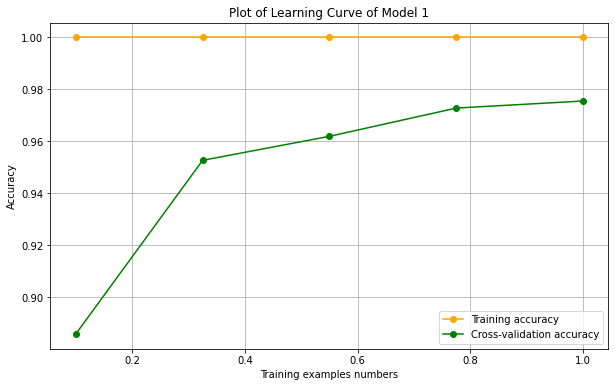


------------- Completed Training for model 1 ------------
------------- Training for model 2 ---------------


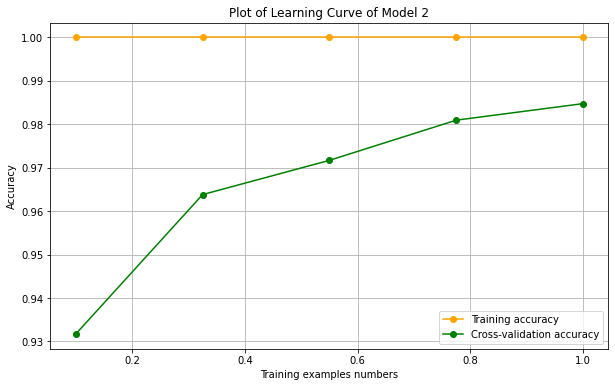


------------- Completed Training for model 2 ------------
------------- Training for model 3 ---------------


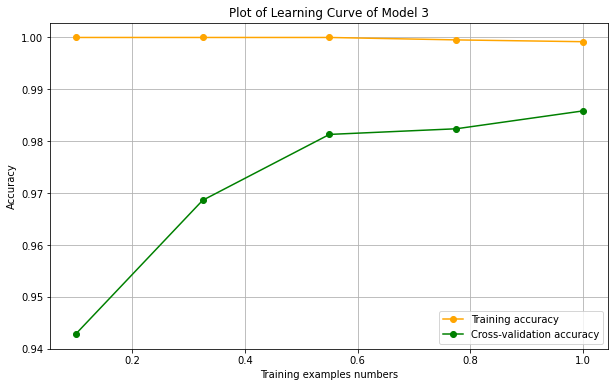


------------- Completed Training for model 3 ------------


In [ ]:
model_list = [] # Contains the 3 models
transforms = [] # Contains transforms for data dimesions reduction for each model
plots = [] # Contains the plot object of each model's learning curve
for i in range(3):
  print("------------- Training for model %s ---------------" % str(i+1))
  clf  = XGBClassifier()
  clf.fit(training_list[i], target_list[i])
  sfm = SelectFromModel(clf, prefit=True)
  transforms.append(sfm)
  clf = XGBClassifier()
  clf.fit(sfm.transform(training_list[i]), target_list[i])
  model_list.append(clf)
  title = "Plot of Learning Curve of Model %s" % str(i+1)
  plt = plot_learning_curve(clf, sfm.transform(training_list[i]), target_list[i], title)
  plt.show()
  plots.append(plt)
  print()
  print("------------- Completed Training for model %s ------------" % str(i+1))

## Step 6: Training the Assemble model (Neural Network)

<br>
<br>
<span style="font-size:1.2em;">

1. The function `stacked_training` helps in preparing the data that will be feeded into the neural network for training. The neural network is trained based on the outputs produced by the three models.
    
    * The main function of the neural network model here is to learn the **weight-function** of the inputs fed by the three classifier models and use it for further predictions.


2. The function `assemble_model` prepares a neural network and then trains based on the output of `stacked_training` and the corresponding target variables
</span>

In [ ]:
def stacked_training(X):
  """
  This functions stacks the probability vectors that are generated
  from the prediction of each model
  Example:
    Here we have 3 models, `n` samples and 6 classes. Therefore each model will
    produce (n, 6) array of probability prediction, then Horizontal stacking will
    produce (n, 6*3) array of probability prediciton which will be further used
    as the input for assemble model.
  
  Parameters
  ==========

  X: array-like
    Dataset will be predicted on each model of model_list
  
  Returns
  =======

  output: array-like
    Return an array of appropiate dimension for further training of assemble model
  """
  X_stacked = []
  for i in range(0, len(model_list)):
    X_stacked.append(model_list[i].predict_proba(transforms[i].transform(X)))
  return np.hstack(X_stacked)

In [ ]:
def assemble_model(X, Y):
  """
  This functions creates a small assemble model which is trained on the
  output produced by the models of the model_list

  Parameters
  ==========

   X: array-like
    Dataset used for training the assemble model
   y: array-like
    Target variables
  
  Returns
  =======
  
  The history of model fitting and the trained model
  """
  X = stacked_training(X)
  Y = to_categorical(Y-1)
  batch_size = 16
  epochs = 10
  model = Sequential()
  model.add(Dense(32, input_shape=X[0].shape, activation='relu'))
  model.add(Dense(6, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y,
                      batch_size=batch_size,
                      epochs=epochs
                      )
  return history, model

In [ ]:
# Training on the 4th part of dataset
final_model_history, final_model = assemble_model(training_list[3], target_list[3]) 

Epoch 1/10
460/460 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.9468
Epoch 2/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0308 - accuracy: 0.9933
Epoch 3/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 0.9943
Epoch 4/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9946
Epoch 5/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0179 - accuracy: 0.9946
Epoch 6/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 7/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9954
Epoch 8/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0163 - accuracy: 0.9952
Epoch 9/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.9956
Epoch 10/10
460/460 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.9954

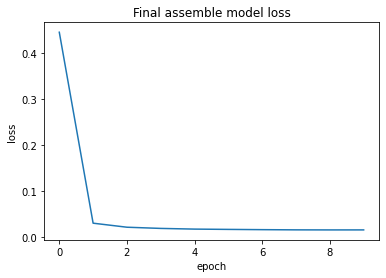

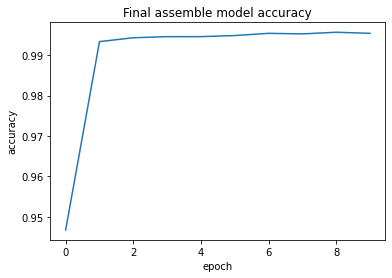

In [ ]:
# Plotting the loss and accuracy of the final assemble model
plt.plot(final_model_history.history['loss'])
plt.title('Final assemble model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.plot(final_model_history.history['accuracy'])
plt.title('Final assemble model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Step 7: Predictions on Testing Data

<br>
<br>
<span style="font-size:1.2em;">

1. The function `predict_assemble_model` helps in producing the predictions of the testing data using the complete model architecture pipeline generated and returns the true values, final predictions, probability predictions and the accuracy score on the test data.
</span>

In [ ]:
X_final_test, Y_final_test = get_data(train=False)
X_final_test.shape, Y_final_test.shape

((2947, 561), (2947,))

In [ ]:
def predict_assemble_model(model, X_test, Y_test):
  """
  This functions helps in predicting from testing data

  Parameters
  ==========

  model: assemble model

  X_test: array-like
    Dataset that is to be predicted from assemble model
  
  Y_test: array-like
    True value of target variables
  
  Returns
  =======

  Returns the true value of target variables, probability of predictions,
  predicted value and accuracy
  """
  X_test = stacked_training(X_test)
  Y_pred = model.predict(X_test)
  Y_pred_proba = Y_pred.copy()
  Y_pred = np.argmax(Y_pred, axis=1)+1
  return Y_test, Y_pred, Y_pred_proba,accuracy_score(Y_test, Y_pred)

In [ ]:
Y_true, Y_pred, Y_pred_proba, accuracy = predict_assemble_model(final_model, X_final_test, Y_final_test)
print("The final accuracy obtained by the overall model architecture is: ", accuracy*100)

The final accuracy obtained by the overall model architecture is:  93.04377332880895


## Step 8: Evaluations

<br>
<br>
<span style="font-size:1.2em;">

1. The function `draw_confusion_matrix` helps to produce the produce the confusion matrix of the overall predictions and their true values.
    * A **confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known
</span>

In [ ]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

def draw_confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y-1] for y in Y_true])
    Y_pred = pd.Series([ACTIVITIES[y-1] for y in Y_pred])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [ ]:
confusion_matrix = draw_confusion_matrix(Y_true, Y_pred)
confusion_matrix

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,423,66,0,0,2
STANDING,0,33,499,0,0,0
WALKING,0,0,0,489,6,1
WALKING_DOWNSTAIRS,0,0,0,5,380,35
WALKING_UPSTAIRS,0,1,0,50,6,414


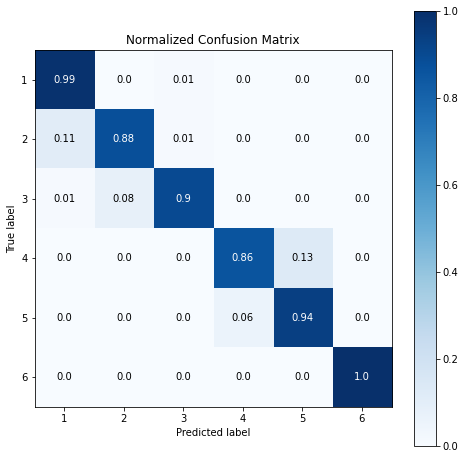

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_true, Y_pred, normalize=True, figsize=(8, 8)) # Plotting Normalized Confusion Matrix


### Classfication report

<br>

<span style="font-size:1.2em;">
 
* A **Classification report** is used to measure the quality of predictions from a classification algorithm. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report 
 </span>

In [ ]:
print(classification_report(Y_true, Y_pred, target_names=list(ACTIVITIES.values())))

                    precision    recall  f1-score   support

           WALKING       0.90      0.99      0.94       496
  WALKING_UPSTAIRS       0.92      0.88      0.90       471
WALKING_DOWNSTAIRS       0.97      0.90      0.94       420
           SITTING       0.93      0.86      0.89       491
          STANDING       0.88      0.94      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



### ROC Curve

<br>
<span style="font-size:1.2em;">

* An **ROC curve** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    1. True Positive Rate
    2. False Positive Rate
</span>

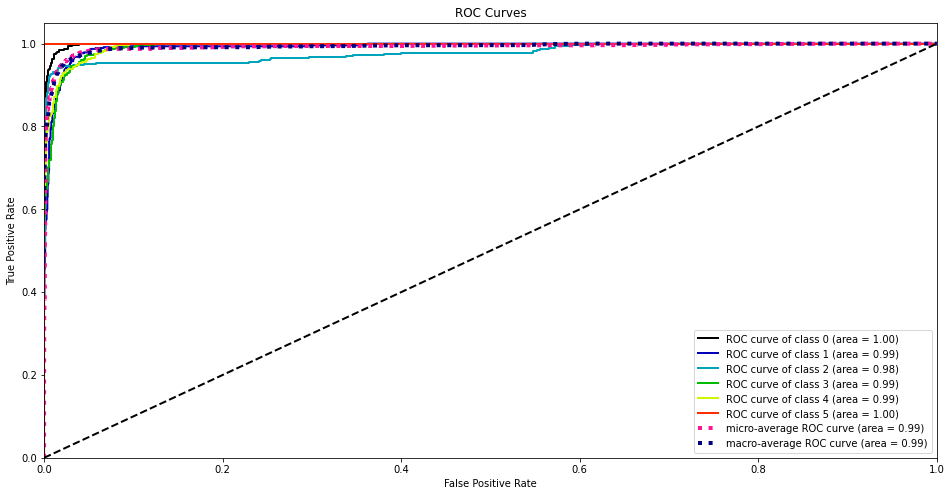

In [ ]:
skplt.metrics.plot_roc(Y_true-1, Y_pred_proba, text_fontsize="medium", figsize=(16, 8))  # Plot the ROC curve

# Conclusion

<br>
<br>
<span style="font-size:1.2em;">

Using the approach of *Federated Learning* we were able to build a small prototype of Federated Learning models using the **UCI-HAR Dataset** and achieved the final accuracy of the overall architecture around **93%**.
</span>

# References

<br>
<br>
<span style="font-size:1.2em;">
 
[1] [Human Activity Recognition Using Smartphones Data Set](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

[2] [XGBOOST](https://xgboost.readthedocs.io/en/latest/python/python_intro.html)

[3] [sklearn](https://scikit-learn.org/)
</span>